In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [16]:
prefixes = ['control', 'dependency', 'execution']

In [17]:
# making dataframe
df1 = pd.read_csv("ayaz_perf_microbenchmarks.csv")
X = df1["Benchmark"]
Y1 = df1["IPC"]
Y2 = df1["Cycles"]
Y3 = df1["Instructions"]
Y4 = df1["Seconds"]
Y5 = df1["IPS"]

df2 = pd.read_csv("ayaz_gem5_microbenchmarks.csv")
X_2 = df2["Benchmark"]
Y1_2 = df2["IPC"]
Y2_2 = df2["Cycles"]
Y3_2 = df2["Instructions"]
Y4_2 = df2["Seconds"]
Y5_2 = df2["IPS"]

In [18]:
def plot(stat):
    data = {}
    data_sorted = {}
    i = 0
    j = 0

    for b, bench in enumerate(X):
        diff = (df2[stat].iloc[b] - df1[stat].iloc[b])
        data[bench] = diff
    
    keys = sorted(data, key=data.get)
    for r in keys:
        data_sorted[r] = [data[r]]


    # match a key from dictionary to an array of prefixes
    for k, v in data_sorted.items():
        for p in prefixes:
            if k.startswith(p):
                data_sorted[k].append(prefixes.index(p))
    
    

    for b, bench in data_sorted.items():
        plt.bar(i, data_sorted[b][0], 0.2, color="C" + str(data_sorted[b][1]))
        i = i + 1
    
    for i, pfrm in enumerate(prefixes):
        plt.bar(0, 0, color="C" + str(i), label=pfrm)
    
    plt.xticks((np.arange(len(data_sorted))), data_sorted, rotation=80, ha="center", fontsize=11)

    plt.xlabel("Benchmarks")
    plt.ylabel(stat)
    plt.title("Benchmark vs. " + stat)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.rcParams["figure.figsize"]=20,10
    plt.show()

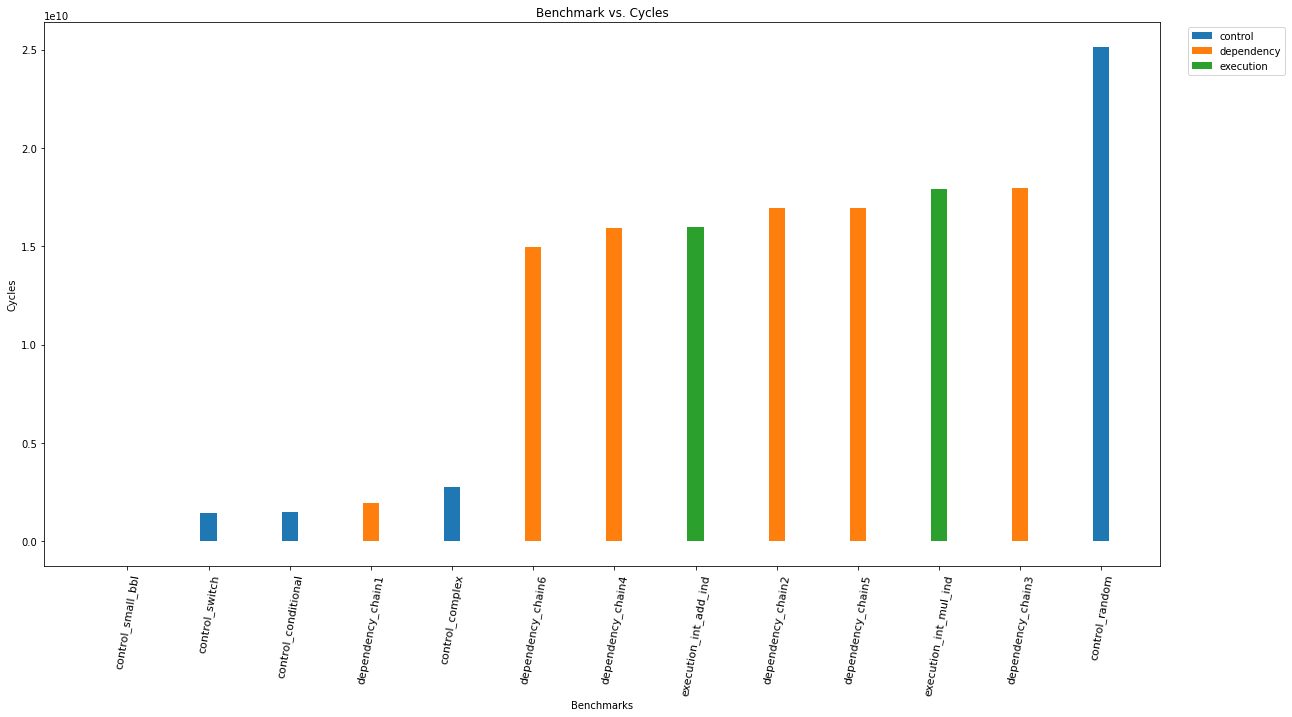

In [24]:
plot("Cycles")

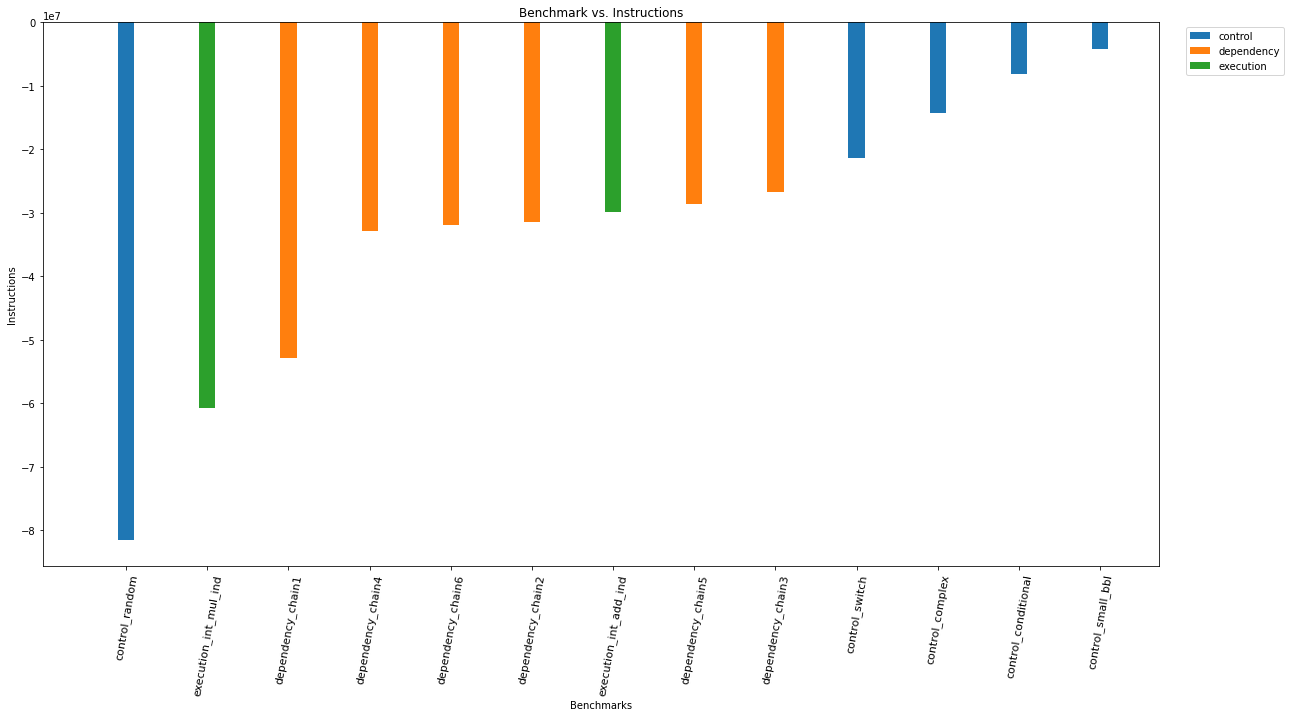

In [20]:
plot("Instructions")

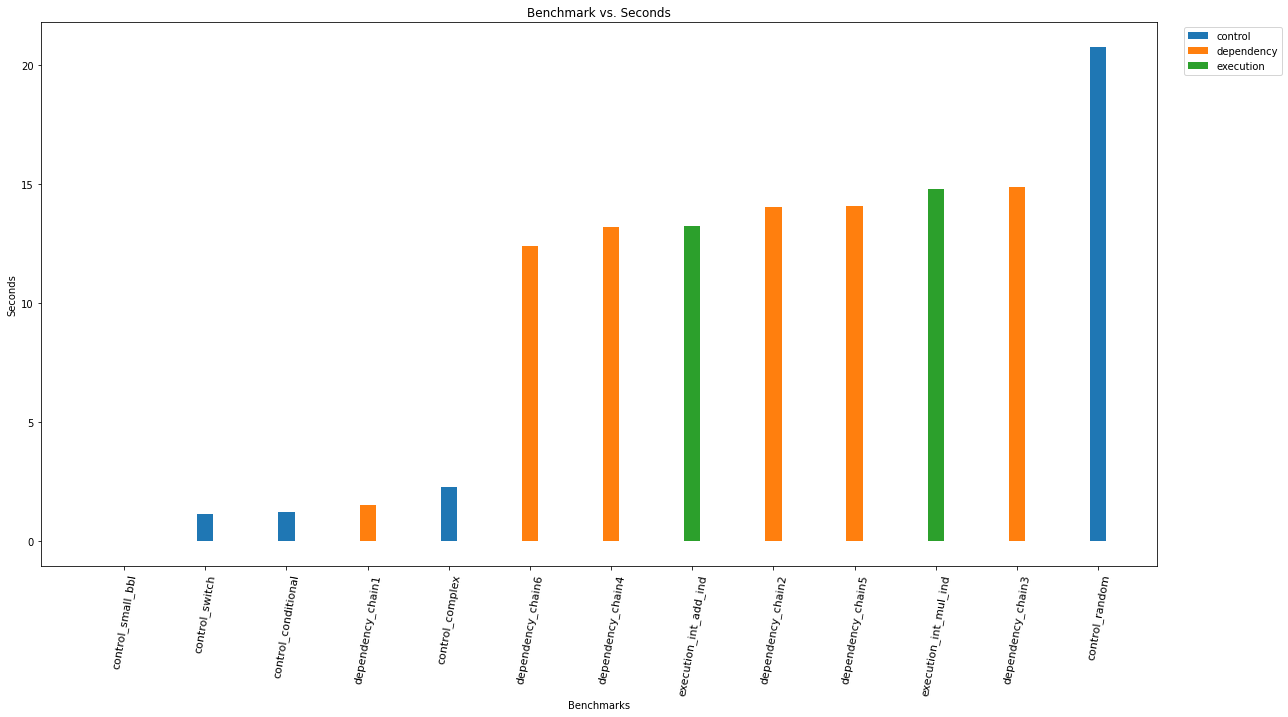

In [21]:
plot("Seconds")

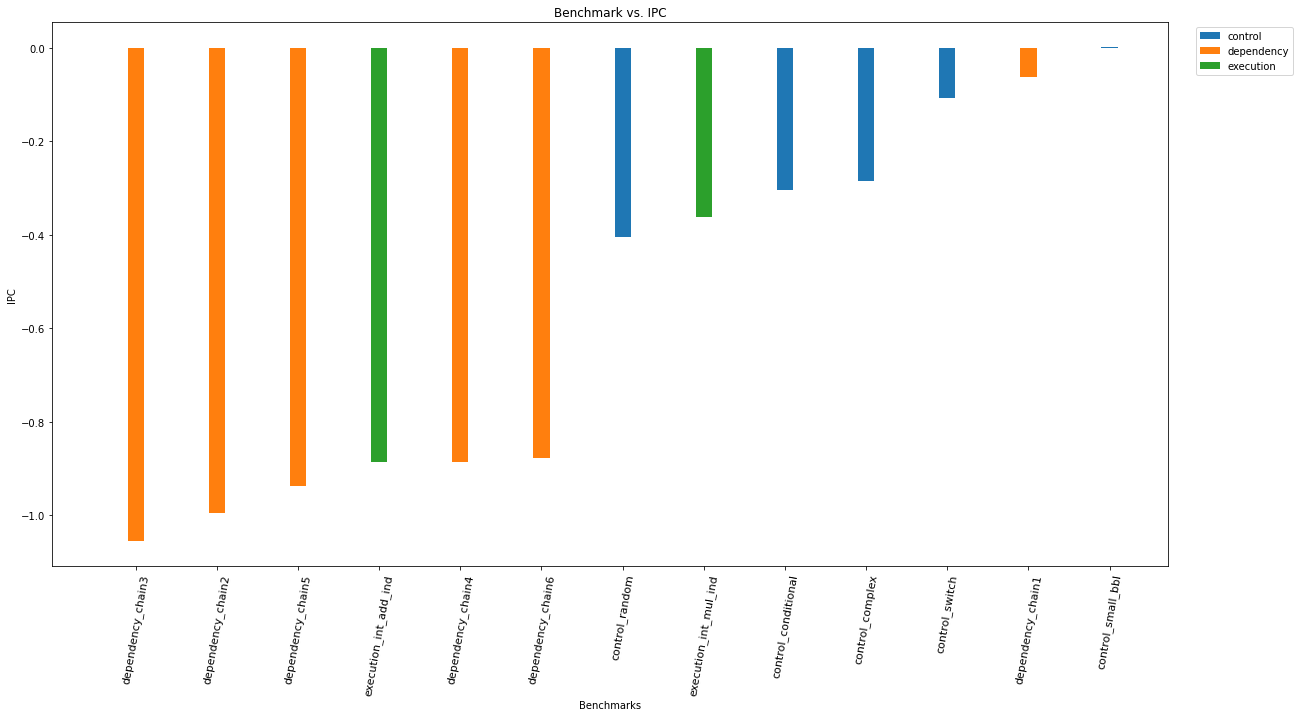

In [22]:
plot("IPC")

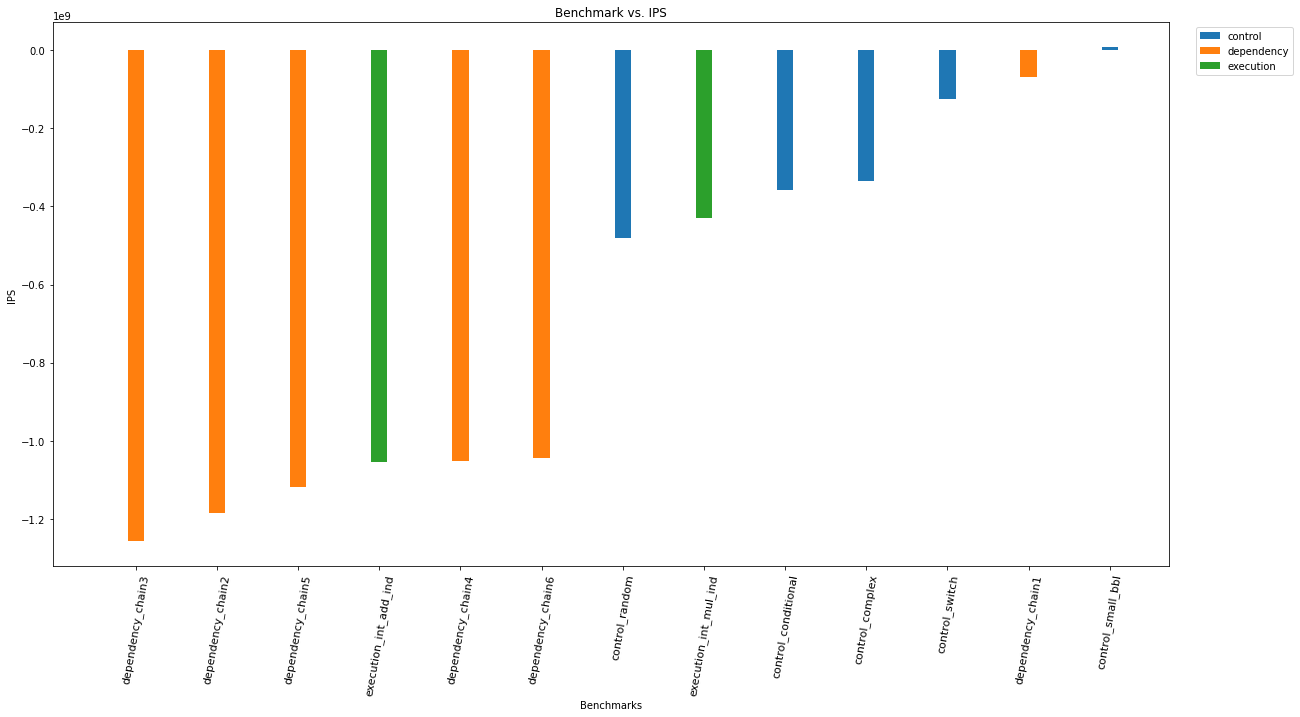

In [23]:
plot("IPS")